In [1]:
# Tran Quy Loc Data Science Intern
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu từ các tệp CSV vào từ điển file_paths
file_paths = {
    'FPT': pd.read_csv('FPT.csv'),
    'MSN': pd.read_csv('MSN.csv'),
    'PNJ': pd.read_csv('PNJ.csv'),
    'VIC': pd.read_csv('VIC.csv')
}

In [3]:
data_frames = {}

In [4]:
for stock, df in file_paths.items():
    print(f'--- {stock} ---')
    print(df.head())  # Xem phần đầu
    print(df.tail())  # Xem phần đuôi
    
    # Chuyển đổi cột 'Date/Time' thành định dạng datetime
    df['Date'] = pd.to_datetime(df['Date/Time'])
    df.set_index('Date', inplace=True)  # Thiết lập cột 'Date' làm chỉ số
    df.drop(columns=['Date/Time'], inplace=True)

    # Tính SMA và EMA
    window = 100  
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['EMA'] = df['Close'].ewm(span=window, adjust=False).mean()
    
    # Lưu DataFrame vào từ điển data_frames
    data_frames[stock] = df

--- FPT ---
  Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0
      Ticker         Date/Time  Open  High   Low  Close  Volume  Open Interest
97401    FPT  12/22/2020 14:24  58.2  58.2  58.2   58.2   27470              0
97402    FPT  12/22/2020 14:25  58.2  58.2  58.2   58.2   14820              0
97403    FPT  12/22/2020 14:26  58.2  58.2  58.2   58.2     500              0
97404    FPT  12/22/2020 14:29  58.1  58.1  58.1   58.1    2500              0
97405    FPT  12/22/2020 14:46  58.1  58.1  58.1   58.1   11170              0
--- MSN ---
  Ticker        Date/Time  Open  High   

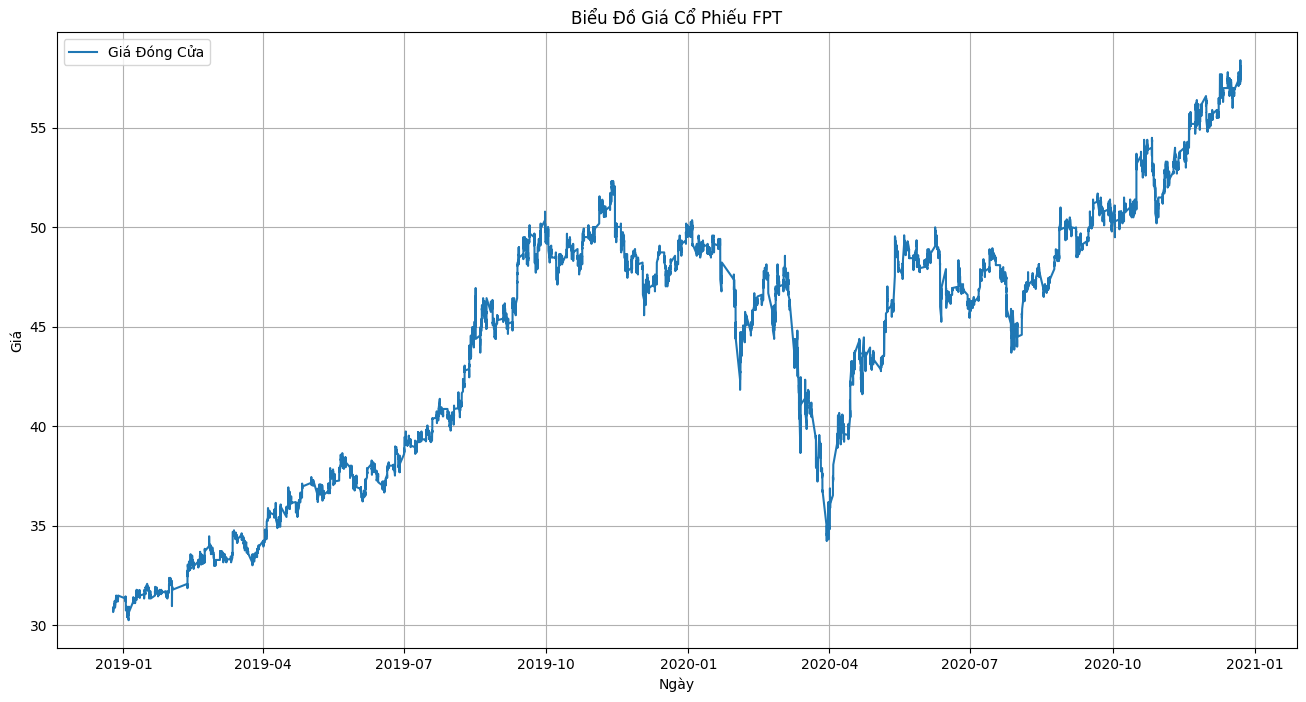

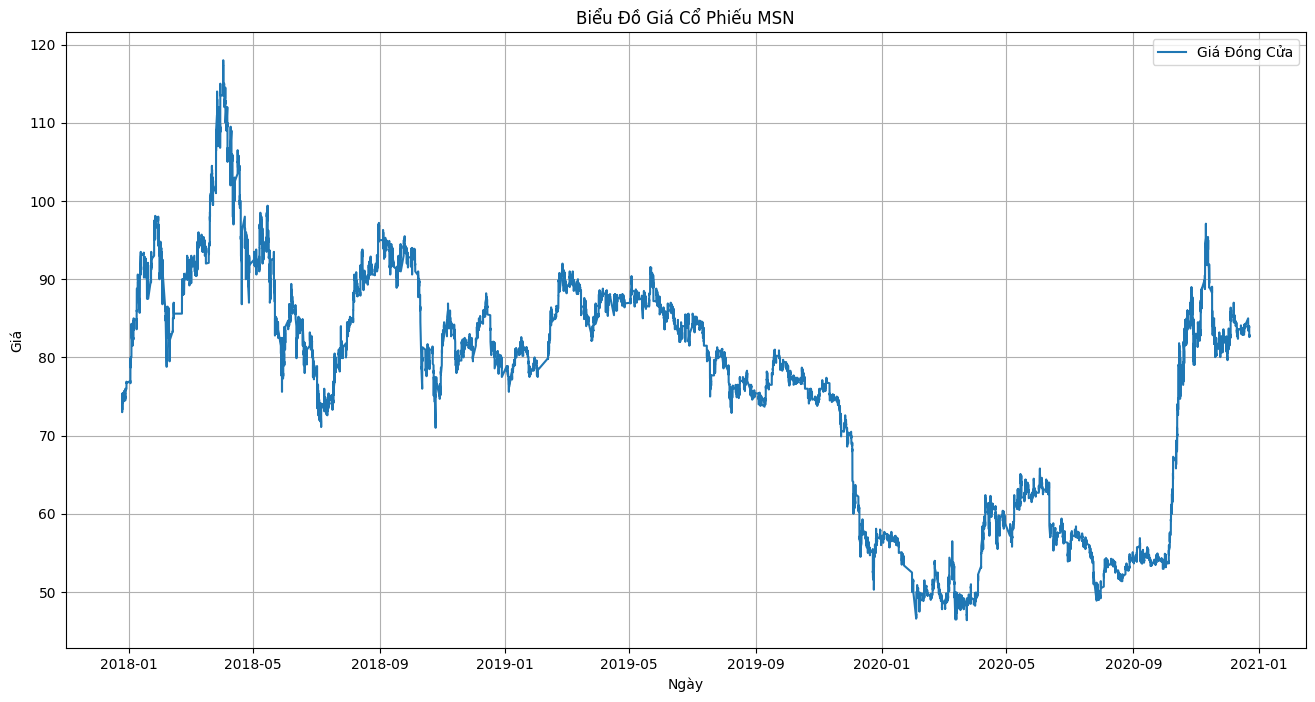

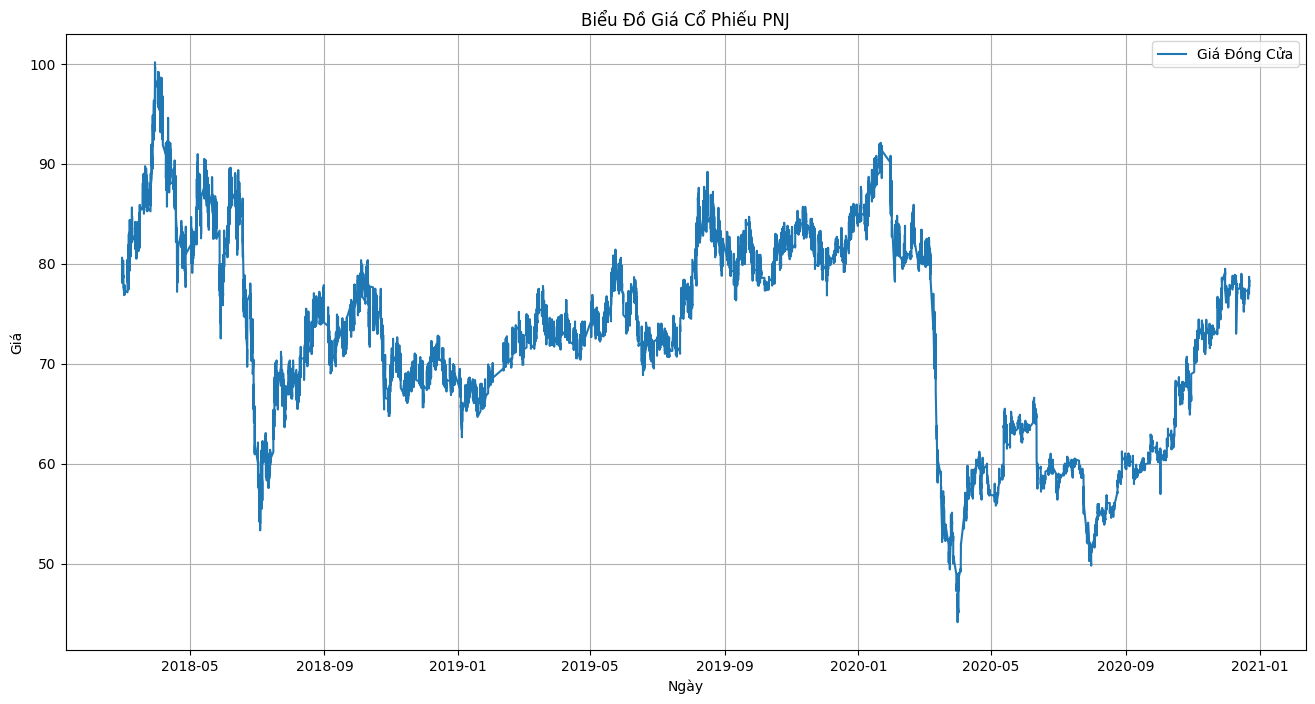

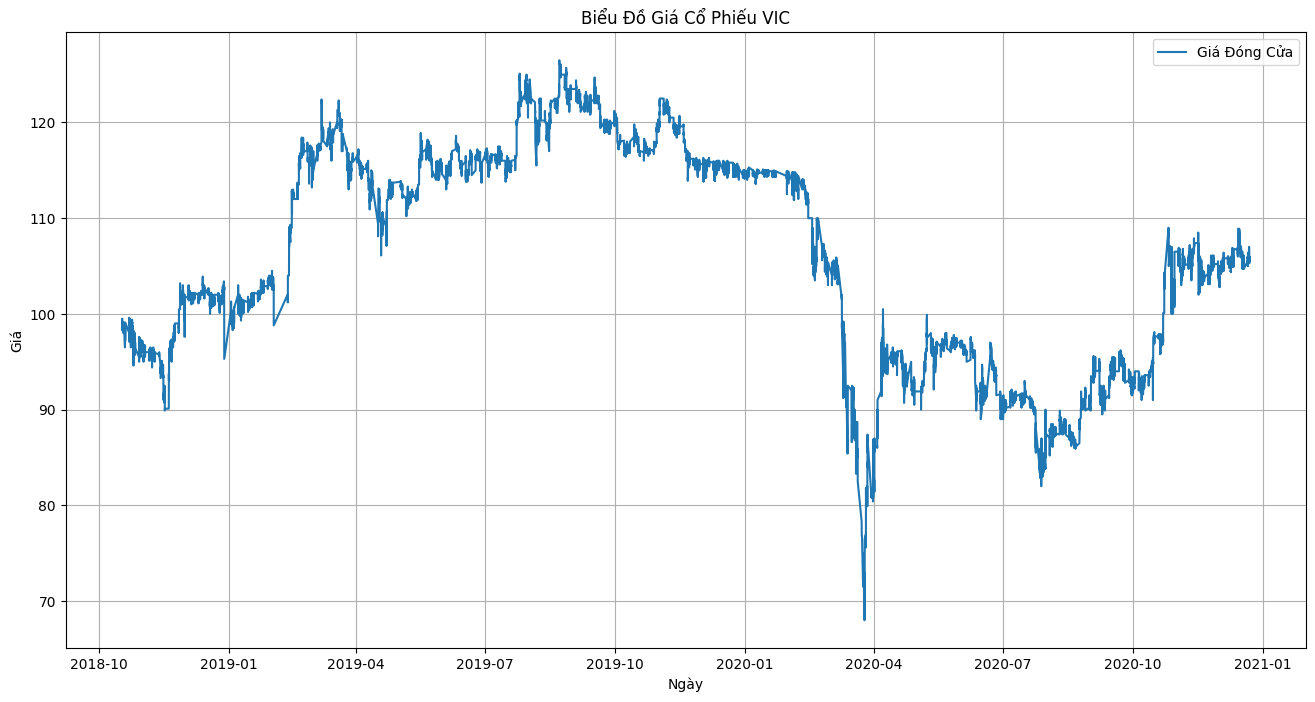

In [5]:
# Tạo biểu đồ cho từng cổ phiếu
for stock in data_frames.keys():
    df = data_frames[stock]
    plt.figure(figsize=(16, 8)) 
    plt.plot(df['Close'], label='Giá Đóng Cửa')
    plt.title(f'Biểu Đồ Giá Cổ Phiếu {stock}')
    plt.xlabel('Ngày')
    plt.ylabel('Giá')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
N = 1  # Số ngày (hoặc phút, giờ) để tính biến động

In [7]:
print(file_paths['FPT'].head())

                    Ticker   Open   High    Low  Close  Volume  Open Interest  \
Date                                                                            
2018-12-25 09:15:00    FPT  30.89  30.89  30.89  30.89   35410              0   
2018-12-25 09:16:00    FPT  30.81  30.81  30.81  30.81     190              0   
2018-12-25 09:17:00    FPT  30.74  30.81  30.74  30.74    1120              0   
2018-12-25 09:18:00    FPT  30.74  30.74  30.74  30.74    2120              0   
2018-12-25 09:19:00    FPT  30.74  30.74  30.74  30.74   22500              0   

                     SMA        EMA  
Date                                 
2018-12-25 09:15:00  NaN  30.890000  
2018-12-25 09:16:00  NaN  30.888416  
2018-12-25 09:17:00  NaN  30.885477  
2018-12-25 09:18:00  NaN  30.882596  
2018-12-25 09:19:00  NaN  30.879772  


In [8]:
for stock in data_frames.keys():
    df = data_frames[stock]  
    df['Current Price'] = df['Close']
    
    # Tính biến động giá cổ phiếu
    df['Price Change'] = df['Close'].shift(-N) - df['Current Price']
    data_frames[stock] = df
    print(f"--- {stock} ---")
    print(data_frames[stock][['Current Price', 'Price Change']].head())

--- FPT ---
                     Current Price  Price Change
Date                                            
2018-12-25 09:15:00          30.89         -0.08
2018-12-25 09:16:00          30.81         -0.07
2018-12-25 09:17:00          30.74          0.00
2018-12-25 09:18:00          30.74          0.00
2018-12-25 09:19:00          30.74          0.00
--- MSN ---
                     Current Price  Price Change
Date                                            
2017-12-25 09:15:00           73.1          -0.1
2017-12-25 09:16:00           73.0           0.5
2017-12-25 09:18:00           73.5          -0.4
2017-12-25 09:20:00           73.1          -0.1
2017-12-25 09:21:00           73.0           0.1
--- PNJ ---
                     Current Price  Price Change
Date                                            
2018-02-28 09:15:00          78.99         -0.05
2018-02-28 09:16:00          78.94         -0.80
2018-02-28 09:19:00          78.14          0.00
2018-02-28 09:20:00          78.1

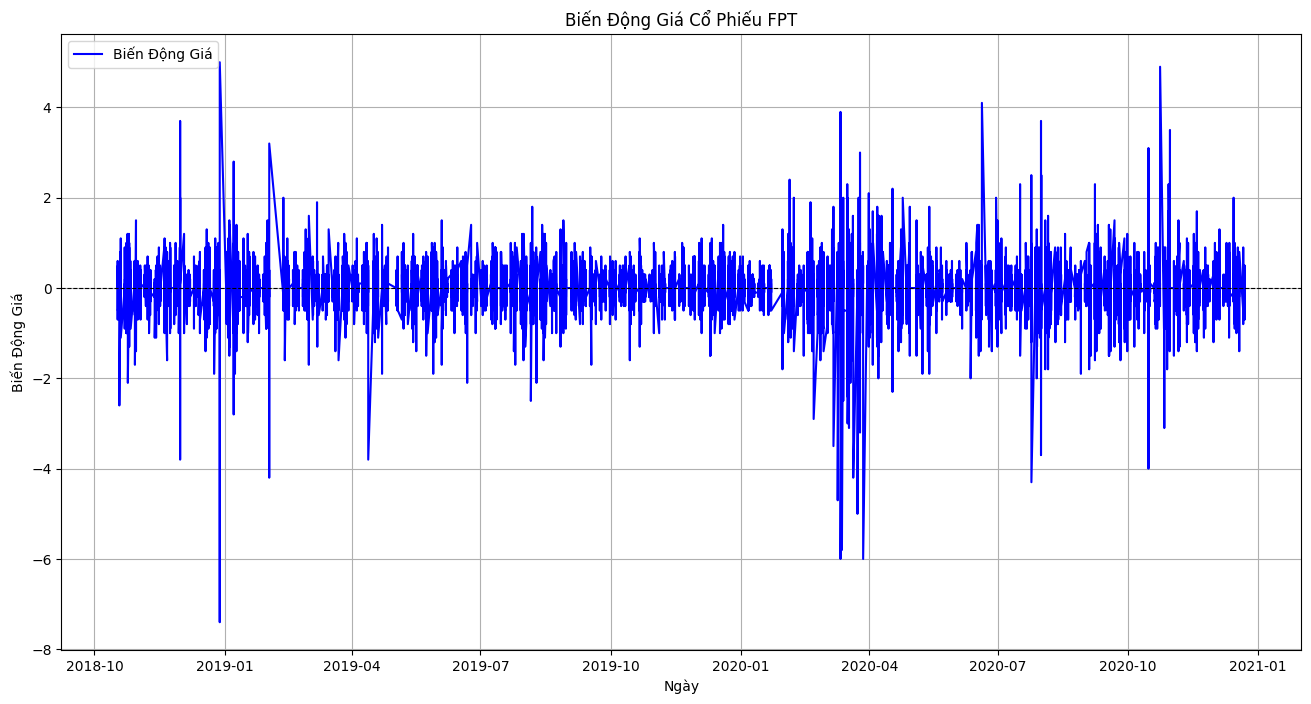

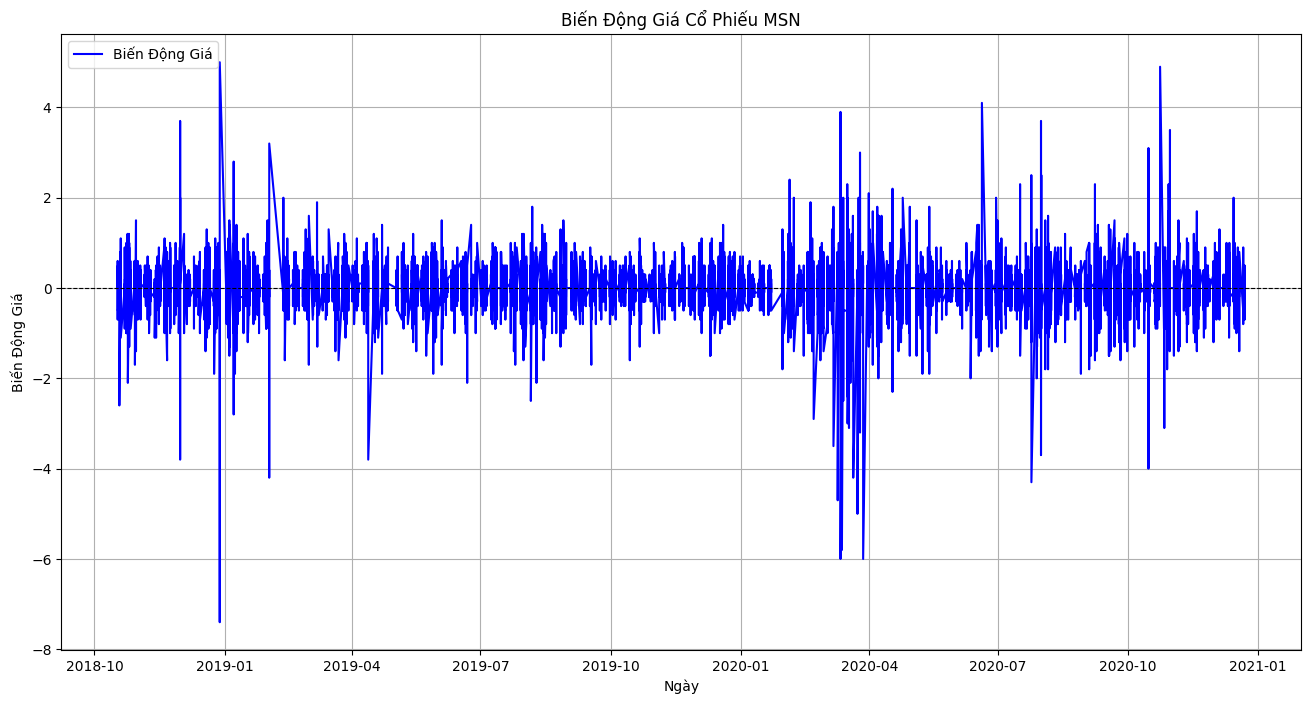

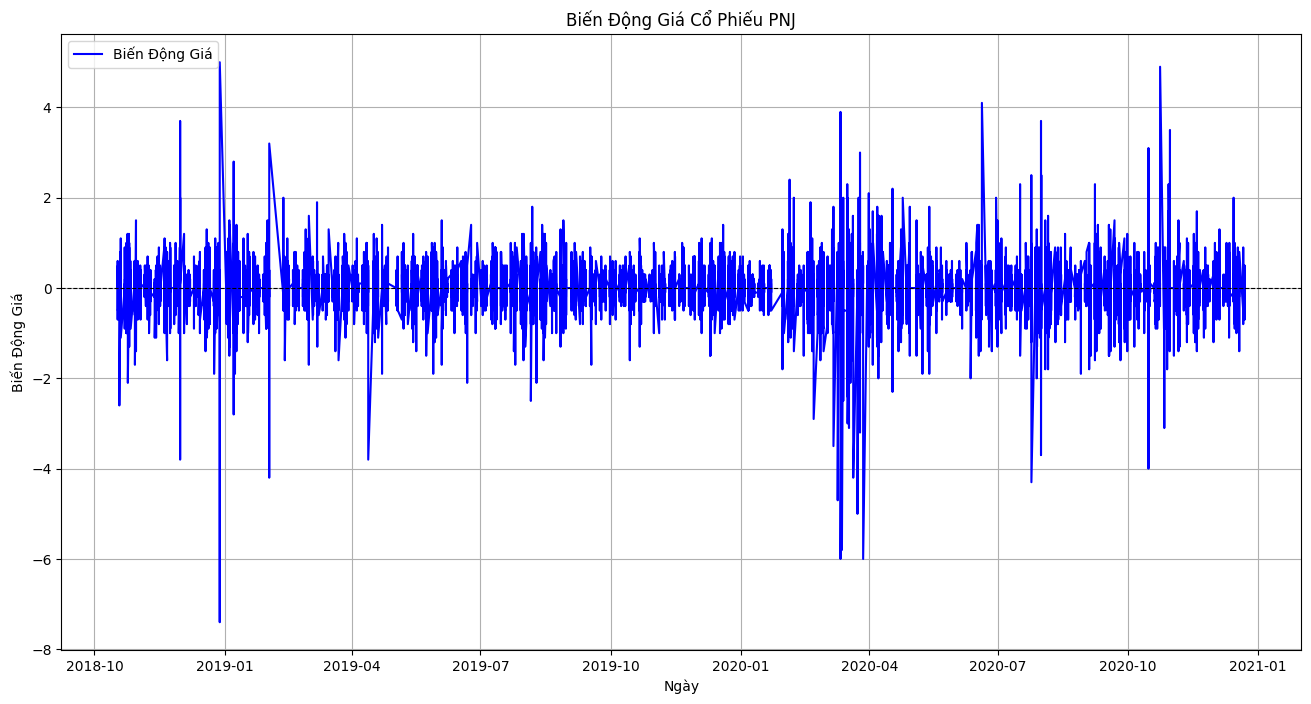

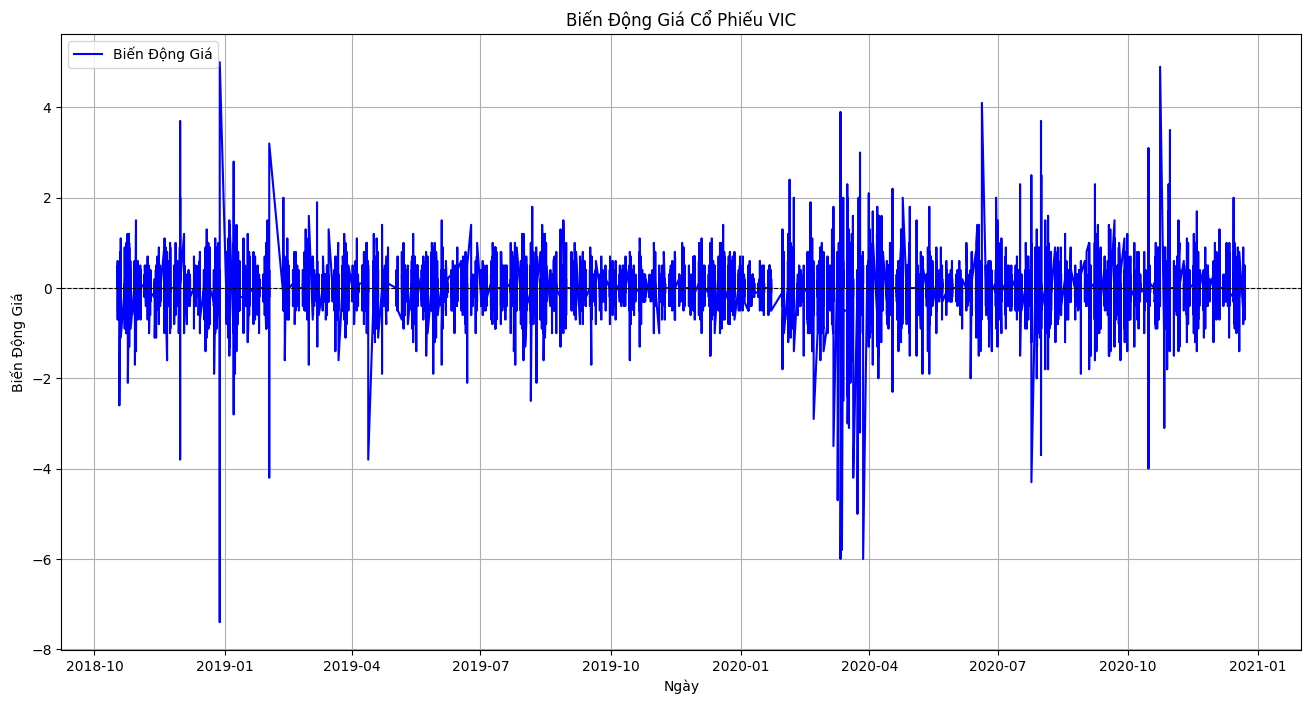

In [9]:
# Kiểm tra kết quả cho từng cổ phiếu
for stock in data_frames.keys():
    # Vẽ biểu đồ
    plt.figure(figsize=(16, 8))  
    plt.plot(df['Price Change'], label='Biến Động Giá', color='blue')
    plt.title(f'Biến Động Giá Cổ Phiếu {stock}')  
    plt.xlabel('Ngày')
    plt.ylabel('Biến Động Giá')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
    plt.legend()
    plt.grid()
    plt.show()

--- FPT ---
Latest SMA: 57.758
Latest EMA: 57.846919348749196



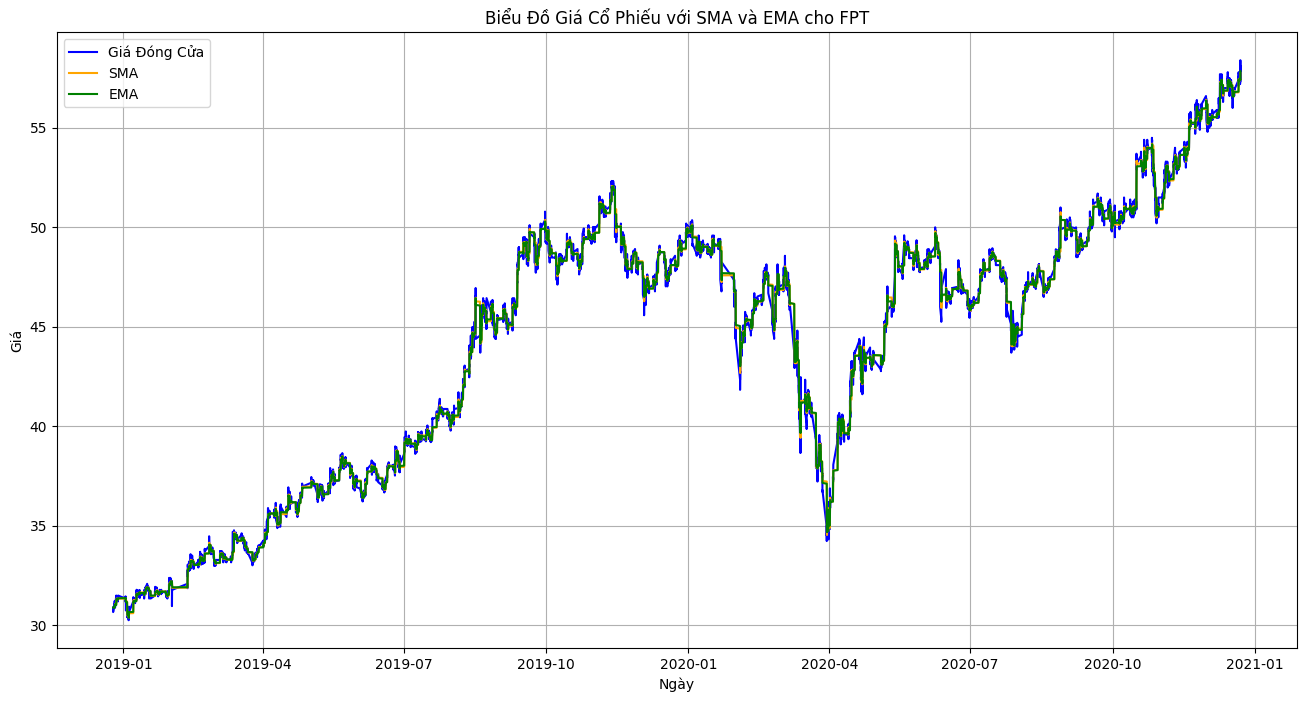

--- MSN ---
Latest SMA: 82.77799999999999
Latest EMA: 82.83475402023537



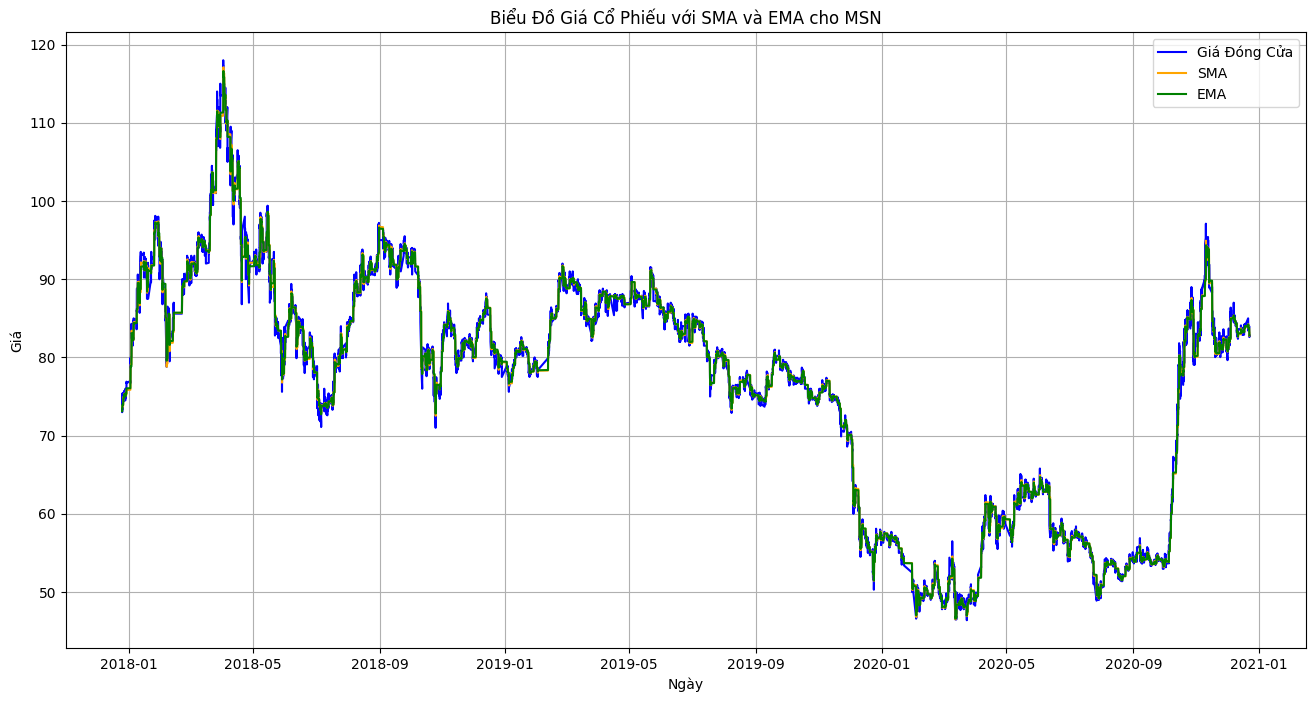

--- PNJ ---
Latest SMA: 78.07600000000001
Latest EMA: 78.09917631721359



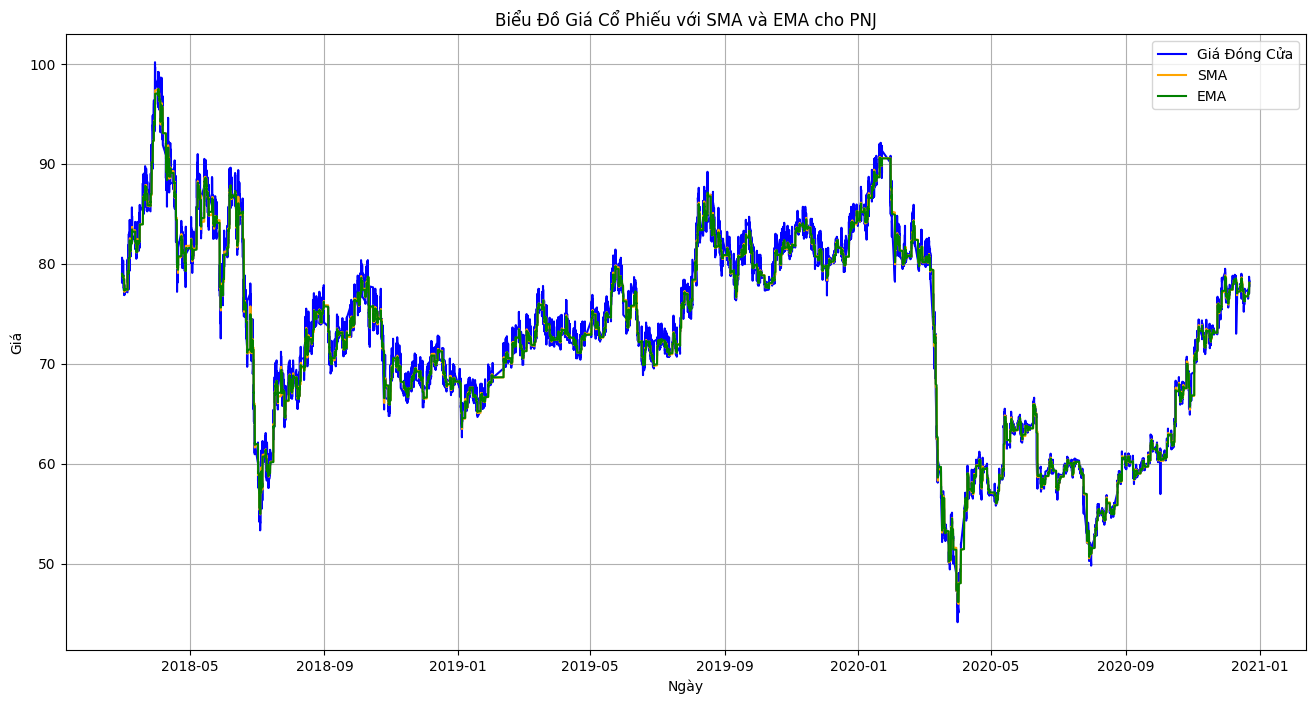

--- VIC ---
Latest SMA: 105.774
Latest EMA: 105.85647057065563



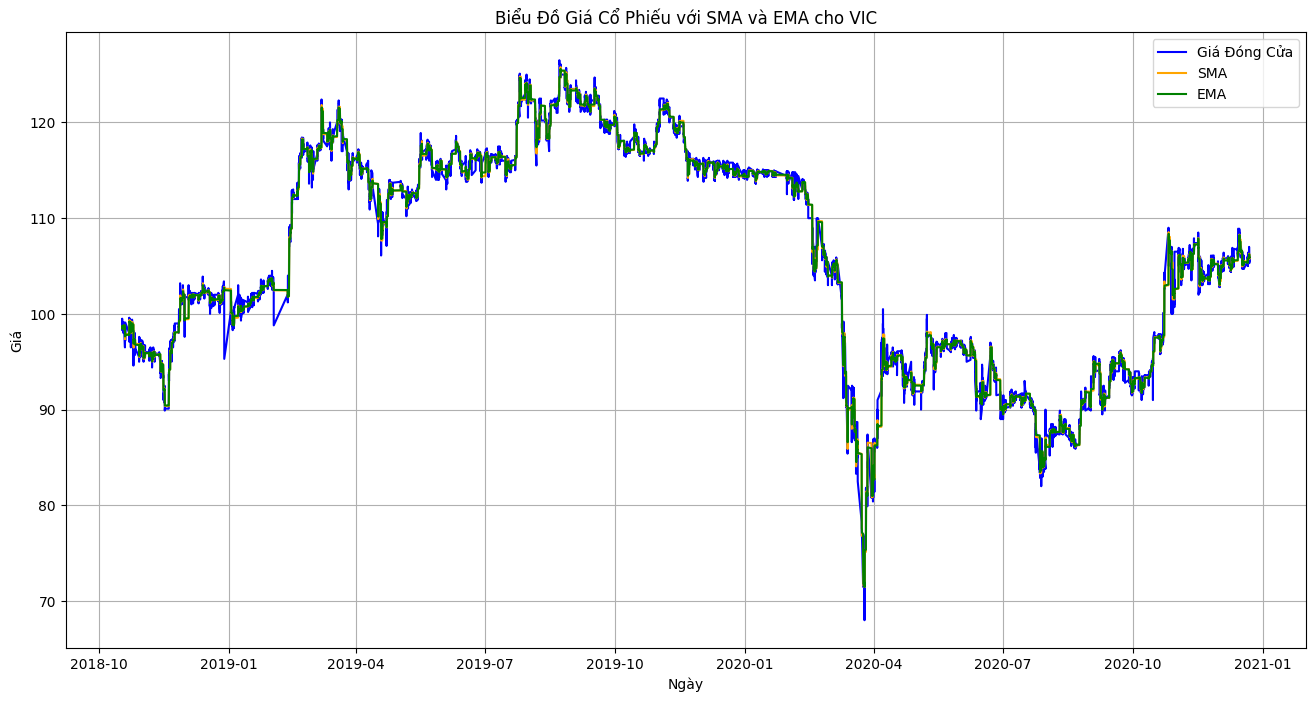

In [10]:
for stock in data_frames.keys():
    
    df = data_frames[stock]
    # In giá trị SMA và EMA gần nhất
    print(f'--- {stock} ---')
    print('Latest SMA:', df['SMA'].iloc[-1])
    print('Latest EMA:', df['EMA'].iloc[-1])
    print()
    
    plt.figure(figsize=(16, 8)) 
    plt.plot(df['Close'], label='Giá Đóng Cửa', color='blue')
    plt.plot(df['SMA'], label='SMA', color='orange')
    plt.plot(df['EMA'], label='EMA', color='green')
    plt.title(f'Biểu Đồ Giá Cổ Phiếu với SMA và EMA cho {stock}')
    plt.xlabel('Ngày')
    plt.ylabel('Giá')
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [12]:
#Tạo nơi lưu kết quả
results = {}

for stock, df in file_paths.items():
    
    df['Price Direction'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    df.dropna(subset=['Price Direction'], inplace=True)

    # Tách dữ liệu thành biến độc lập (X) và nhãn (y)
    X = df[['Open', 'High', 'Low', 'Close']]
    y = df['Price Direction'].values

    # Đảm bảo rằng X và y có cùng kích thước
    X = X.iloc[:len(y)]

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Tạo mô hình hồi quy logistic
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Dự đoán
    predictions = model.predict(X_test)

    # Tính độ chính xác
    accuracy = accuracy_score(y_test, predictions)

    # In báo cáo phân loại
    report = classification_report(y_test, predictions, target_names=["Down", "Up"])
    conf_matrix = confusion_matrix(y_test, predictions)

    results[stock] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': conf_matrix
    }

# In kết quả cho từng cổ phiếu
for stock, result in results.items():
    print(f'--- {stock} ---')
    print(f'Accuracy: {result["accuracy"]:.2f}')
    print(result['report'])


--- FPT ---
Accuracy: 0.79
              precision    recall  f1-score   support

        Down       0.79      0.99      0.88     15395
          Up       0.49      0.03      0.05      4087

    accuracy                           0.79     19482
   macro avg       0.64      0.51      0.47     19482
weighted avg       0.73      0.79      0.71     19482

--- MSN ---
Accuracy: 0.75
              precision    recall  f1-score   support

        Down       0.76      0.99      0.86     20442
          Up       0.44      0.03      0.06      6629

    accuracy                           0.75     27071
   macro avg       0.60      0.51      0.46     27071
weighted avg       0.68      0.75      0.66     27071

--- PNJ ---
Accuracy: 0.73
              precision    recall  f1-score   support

        Down       0.74      0.98      0.84     18331
          Up       0.51      0.05      0.09      6731

    accuracy                           0.73     25062
   macro avg       0.62      0.52      0.47    

In [13]:
import seaborn as sns

Confusion Matrix:
[[15273   122]
 [ 3968   119]]



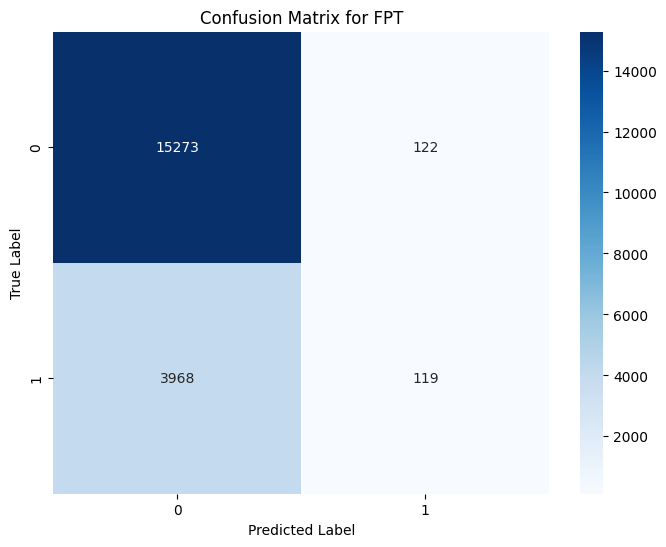

Confusion Matrix:
[[20180   262]
 [ 6420   209]]



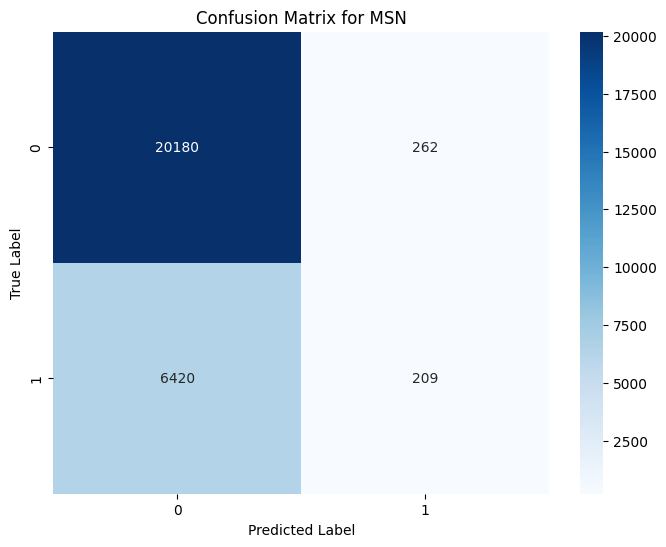

Confusion Matrix:
[[18007   324]
 [ 6392   339]]



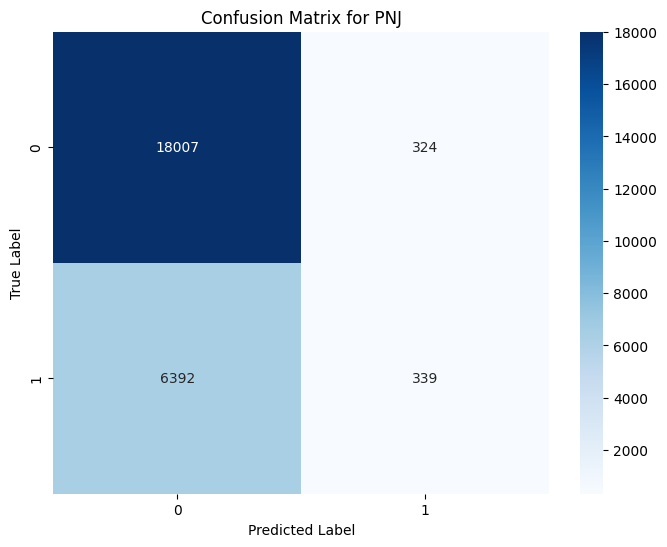

Confusion Matrix:
[[15129   213]
 [ 4660   252]]



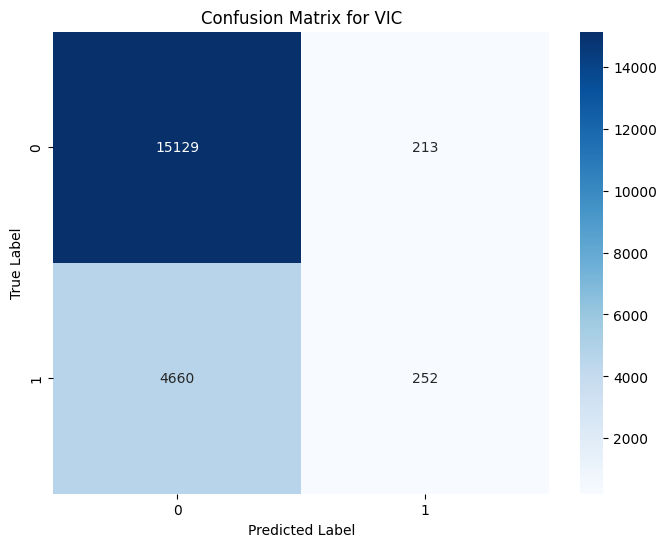

In [14]:
# In kết quả cho từng cổ phiếu
for stock, result in results.items():
    print(f'Confusion Matrix:\n{result["confusion_matrix"]}\n')
    
    # Trực quan hóa ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', 
                xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {stock}')
    plt.show()
